<a href="https://colab.research.google.com/github/PriyankaDhar2/Minor-Projects/blob/main/TitanicClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Titanic Classification using Random Forest Classifier**


In [94]:
#all libraries that are used in this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Loading and Observation

In [59]:
train_data = pd.read_csv("/content/test.csv")
test_data = pd.read_csv("/content/train.csv")

In [60]:
train_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [62]:
train_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [63]:
#joining the both train and test data now for ease of processing
df = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)

## Data Cleaning

In [64]:
#null value clearance
df.columns[df.isnull().any()]

Index(['Age', 'Fare', 'Cabin', 'Embarked', 'Survived'], dtype='object')

In [65]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived        418
dtype: int64

In [66]:
df['Age']= df['Age'].fillna(df['Age'].mean())

In [67]:
df['Survived']= df['Survived'].fillna(df['Survived'].mode()[0])

In [70]:
df= df.drop(columns=['Cabin'],axis=1)

In [73]:
df = df.dropna()

In [74]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

### Outlier detection and removal

In [75]:
def outlier_detect(feature, data):
    outlier_index = []

    for each in feature:
        Q1 = np.percentile(data[each], 25)
        Q3 = np.percentile(data[each], 75)
        IQR = Q3 - Q1
        min_quartile = Q1 - 1.5*IQR
        max_quartile = Q3 + 1.5*IQR
        outlier_list = data[(data[each] < min_quartile) | (data[each] > max_quartile)].index
        outlier_index.extend(outlier_list)

    outlier_index = Counter(outlier_index)
    outlier_data = list(i for i, n in outlier_index.items() if n > 3)
    return outlier_data

In [76]:
outlier_data = outlier_detect(["Age","SibSp","Parch","Fare"], df)
df.loc[outlier_data]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived


In [77]:
df = df.drop(outlier_data, axis=0).reset_index(drop=True)

## Exploratory Data Analysis

<Axes: xlabel='Age', ylabel='Density'>

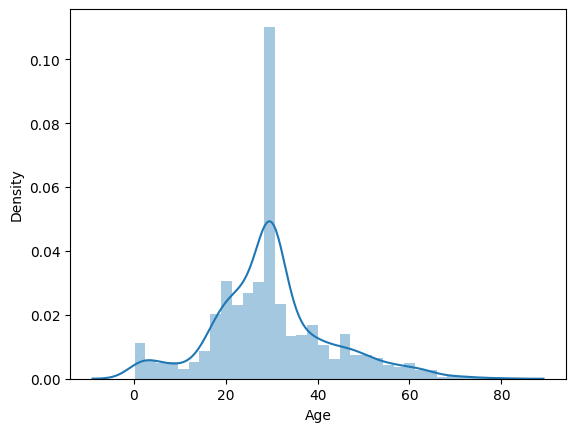

In [78]:
sns.distplot(df['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

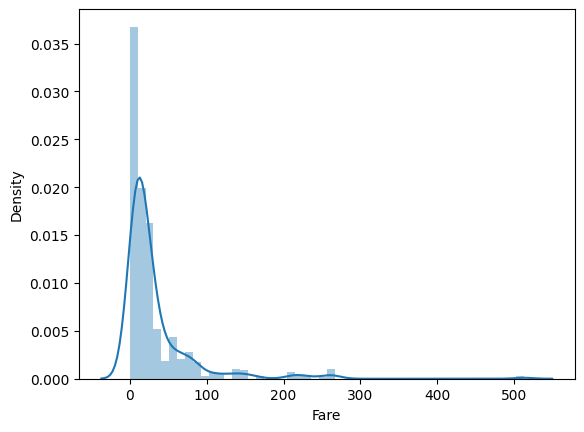

In [79]:
sns.distplot(df['Fare'])

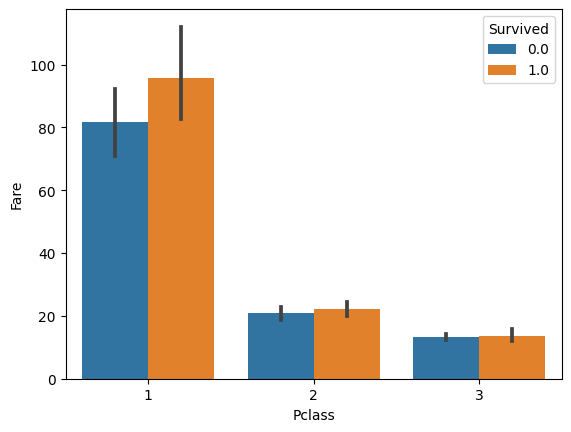

In [80]:
sns.barplot(data=df, x="Pclass", y ="Fare", hue='Survived')
plt.show()

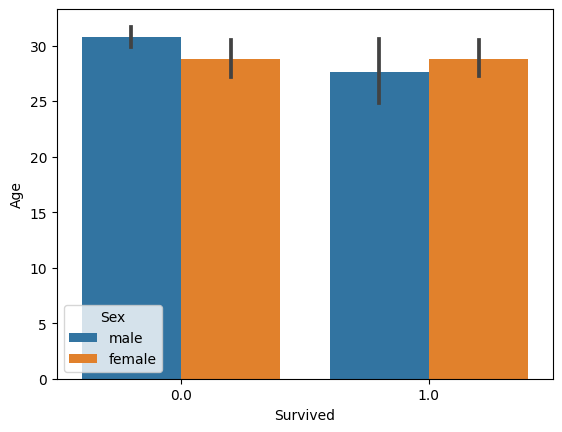

In [81]:
sns.barplot(data=df, x="Survived", y ="Age", hue='Sex')
plt.show()

## Feature Engineering

In [84]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')

In [85]:
#Removing unnecessary columns
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])

In [86]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,34.5,0,0,7.8292,Q,0.0
1,3,female,47.0,1,0,7.0000,S,0.0
2,2,male,62.0,0,0,9.6875,Q,0.0
3,3,male,27.0,0,0,8.6625,S,0.0
4,3,female,22.0,1,1,12.2875,S,0.0


In [87]:
#Encoding the categorical attributes
enc= ['Sex', "Embarked"]

l = LabelEncoder()
for i in enc:
  df[i] = l.fit_transform(df[i])

In [88]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,34.5,0,0,7.8292,1,0.0
1,3,0,47.0,1,0,7.0000,2,0.0
2,2,1,62.0,0,0,9.6875,1,0.0
3,3,1,27.0,0,0,8.6625,2,0.0
4,3,0,22.0,1,1,12.2875,2,0.0


In [89]:
X= df.drop(columns=['Survived'],axis=1)
y= df['Survived']

In [90]:
#usinf train test split to divide the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model Building

In [91]:
# Creating an instance of RFC
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test)

## Model Evaluation

In [92]:
# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.746177370030581


In [93]:
#Model evaluation using Confusion matrix and Classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[200  40]
 [ 43  44]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83       240
         1.0       0.52      0.51      0.51        87

    accuracy                           0.75       327
   macro avg       0.67      0.67      0.67       327
weighted avg       0.74      0.75      0.74       327

